<a href="https://colab.research.google.com/github/itomond-home/Deep-Reinforcement-Learning/blob/develop/Markov%20Decision%20Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# マルコフ決定過程とベルマン方程式


### そもそも (確率)過程 とは
確率過程とは、関数空間に値をとる確率変数のこと。  
また、時間ステップをパラメータとして保持した確率変数の族を指す。  
参考資料：「[経験過程とは何ですか](http://watanabe-www.math.dis.titech.ac.jp/users/swatanab/empirical_process.pdf)」

### マルコフ決定過程(MDP)とは
次の条件付き確率によって記述される確率過程のことを**マルコフ決定過程**という。
$$
p(s',r|s,a)=Pr(S_{t+1}=s',R_{t+1}=r|S_t=s,A_t=a)
$$  

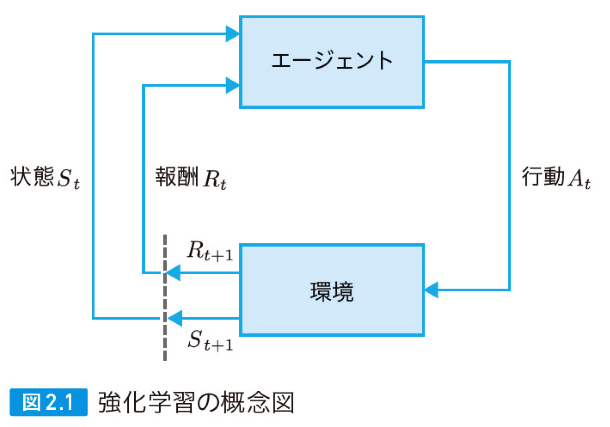

## 方策反復法

与えられた法則の下でベルマン方程式を使って価値関数を検索するステップ（方策評価）と  
得られた価値関数が最大値をとるように方策を更新するステップ（方策改善）を交互に繰り返して最適方策を見つける手法。  


In [ ]:
# 各種ライブラリのインポート
import numpy as np
import copy

In [ ]:
# MDP の設定
p = [0.8,0.5,1.0]

# 割引率の設定
gamma = 0.95

In [ ]:
# 報酬期待値の設定
r = np.zeros((3,3,2))
r[0,1,0] = 1.0
r[0,2,0] = 2.0
r[0,0,1] = 0.0
r[1,0,0] = 1.0
r[1,2,0] = 2.0
r[1,1,1] = 1.0
r[2,0,0] = 1.0
r[2,1,0] = 0.0
r[2,2,1] = -1.0

In [ ]:
"""向かう先に対する報酬が入っている
[[  →H  
    →O  
    →B   ]]
"""
print(r)

[[[ 0.  0.]
  [ 1.  0.]
  [ 2.  0.]]

 [[ 1.  0.]
  [ 0.  1.]
  [ 2.  0.]]

 [[ 1.  0.]
  [ 0.  0.]
  [ 0. -1.]]]


In [ ]:
# 価値関数の初期化
v = [0,0,0]
v_prev = copy.copy(v)

# 行動価値関数の初期化
q = np.zeros((3,2))

# 方策分布の初期化
pi = [0.5,0.5,0.5]

In [ ]:
# 方策評価関数の定義
def policy_estimator(pi,p,r,gamma):
    # 初期化
    R = [0,0,0]
    P = np.zeros((3,3))
    A = np.zeros((3,3))
    
    for i in range(3):
        # 状態遷移行列の計算
        P[i,i] = 1 - pi[i]
        P[i,(i+1)%3] = pi[i]*pi[i]
        P[i,(i+2)%3] = (1-pi[i])*pi[i]

        # 報酬ベクトルの計算
        R[i] = pi[i]*(p[i]*r[i,(i+1)%3,0]+(1-p[i])*r[i,(i+2)%3,0]) + (1-pi[i])*r[i,i,1]
    
    # 行列計算によるベルマン方程式の解を求める
    A = np.eye(3) - gamma*P
    B = np.linalg.inv(A) # 逆行列
    v_sol = np.dot(B,R)

    return v_sol

In [ ]:
# 方策反復法の計算
for step in range(100):
    # 方策評価ステップ
    v = policy_estimator(pi,p,r,gamma)

    # 価値関数 v が前ステップ v_prev を改善しなければ終了
    if np.min(v-v_prev) <= 0:
        break
    
    # 現ステップの価値関数と方策を表示
    print("step:",step,"value:",v,"policy:",pi)

    # 方策改善ステップ
    for i in range(3):
        # 行動価値関数を計算
        q[i,0] = p[i]*(r[i,(i+1)%3,0]+gamma*v[(i+1)%3])+(1-p[i])*(r[i,(i+2)%3,0]+gamma*v[(i+2)%3])
        q[i,1] = r[i,i,1]+gamma*v[i]

        # 行動価値関数のもとで greedy(貪欲的に) 方策を改善
        if q[i,0] > q[i,1]:
            pi[i] = 1
        elif q[i,0] == q[i,1]:
            pi[i] = 0.5
        else:
            pi[i] = 0
    
    # 現ステップの価値関数を記録
    v_prev = copy.copy(v)

step: 0 value: [20.2  20.   20.19] policy: [1, 0, 1]
step: 1 value: [24.73269062 24.77125329 24.49605609] policy: [1, 1, 1]
